In [1]:

from neuron import h,gui

import os
current_directory = os.getcwd()
print(current_directory)
path = os.path.join(current_directory, "mechanisms", "nrnmech.dll")
print(path)
h.nrn_load_dll(path)

from neuron.units import mV,V,m,um,ms
import matplotlib.pyplot as plt
import numpy as np
h.load_file("stdrun.hoc")


#Local Field Potential calculation
h.load_file("./functions/field.hoc")

c:\Users\Pc\Documents\Charite\NEURON\Extracellular_test\HH_simple
c:\Users\Pc\Documents\Charite\NEURON\Extracellular_test\HH_simple\mechanisms\nrnmech.dll


1.0

In [2]:
import functions.HH_minimal_cells as HH_minimal_cells
cell=HH_minimal_cells.Fast_Spiking(0,0,0,0,np.pi/3,0)
h.topology()
for sec in cell.all:
    print(sec.nseg)



|-|       Fast Spiking[0].soma(0-1)
   `--------------------------------------|       Fast Spiking[0].dend(0-1)

1
39


In [3]:

h.load_file("./functions/interpxyz.hoc")
h.load_file("./functions/setpointers.hoc")
cell.soma.psection()


After any change to cell geometry or nseg, be sure to invoke setpointers()


{'point_processes': {'ExpSyn': {ExpSyn[0]}, 'APCount': {APCount[0]}},
 'density_mechs': {'pas': {'g': [0.00015], 'e': [-70.0], 'i': [0.0]},
  'extracellular': {'xraxial': [[1000000000.0, 1000000000.0]],
   'xg': [[1000000000.0, 1000000000.0]],
   'xc': [[0.0, 0.0]],
   'e': [0.0],
   'i_membrane': [0.0],
   'vext': [[0.0, 0.0]]},
  'hh2': {'gnabar': [0.05],
   'gkbar': [0.01],
   'vtraub': [-55.0],
   'm_inf': [0.0],
   'h_inf': [0.0],
   'n_inf': [0.0],
   'tau_m': [0.0],
   'tau_h': [0.0],
   'tau_n': [0.0],
   'm_exp': [0.0],
   'h_exp': [0.0],
   'n_exp': [0.0],
   'm': [0.0],
   'h': [0.0],
   'n': [0.0]},
  'xtra': {'rx': [1.0],
   'x': [16.75],
   'y': [29.011850357055664],
   'z': [0.0],
   'er': [0.0],
   'im': [0.0],
   'ex': [0.0]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [0.0],
   'dina_dv_': [0.0]},
  'k': {'ek': [-100.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.0],
   'dik_dv_': [0.0]}},
 'morphology': {'L': 66.99999884000569,


In [4]:
### Set rx
from functions.calcrx import setelec,homogenous,set_uniform_field_between_plates
#setelec([50],[0],[0])
#remember V=R*I
#for 100 mV, we can do it like this 
#rx=0.001 MOhm
#is=0.1 mA
#rho=100000 #ohm cm
#factor=10
#homogenous(rho,factor)

v_plate=40*V #- potential difference between the plates
distance=1*m #distance
field_orientation=np.array([1,1,0])#along the x axis
ref_point=[0,0,0] #reference point with a 0 e_extracellular

set_uniform_field_between_plates(v_plate,distance,field_orientation,ref_point)

[16.75       29.01185036  0.        ]
[39.26923094 68.01630196  0.        ]
[50.80769282 88.00150446  0.        ]
[ 62.34615469 107.98670695   0.        ]
[ 73.88461657 127.97190945   0.        ]
[ 85.42307845 147.95711195   0.        ]
[ 96.96154033 167.94231444   0.        ]
[108.5000022  187.92751694   0.        ]
[120.03846408 207.91271943   0.        ]
[131.57692596 227.89792193   0.        ]
[143.11538783 247.88312442   0.        ]
[154.65384971 267.86832692   0.        ]
[166.19231159 287.85352942   0.        ]
[177.73077347 307.83873191   0.        ]
[189.26923534 327.82393441   0.        ]
[200.80769722 347.8091369    0.        ]
[212.3461591 367.7943394   0.       ]
[223.88462098 387.7795419    0.        ]
[235.42308285 407.76474439   0.        ]
[246.96154473 427.74994689   0.        ]
[258.50000661 447.73514938   0.        ]
[270.03846781 467.72035168   0.        ]
[281.57692901 487.70555398   0.        ]
[293.11539021 507.69075628   0.        ]
[304.65385141 527.67595858  

In [5]:
dt=0.1*ms
simtime=300*ms
depth=0
modfreq=0

In [6]:
#Set the waveform and amplitude for the stimulus (is)

#Set the waveform and amplitude for the stimulus (is)
import functions.stim as stim

#vector play method
#delay, duration, amplitude
#stim.stimplay(1, 100, 1.57263*2)
#tvec,gvec=stim.stimplay(1,100,-30,simtime)

# squarewave
# cell(just to insert the faux point process)
# cell,delay,freq,number of cycles, amp1, amp2
#fsquare=stim.squarestim(cell,1,100,200,1,-1)

#sinwave
#cell,delay, number of full cycles, frequency, amp
#sinstim(cell,ton,nc,f0,amp)
#fzap=stim.sinstim(cell,1,500,100,1)


#playsin
# ton,amp,dt,dur,simtime,freq
# ton=50
# amp=10
# dur=150
# freq=50
# times,stim1=stim.playsin(ton,amp,dt,dur,simtime,freq)



#simpleplaysin
#amp,dt,tstop,freq

# amp=100
# tstop=simtime
# freq=100
# times,stim1=stim.simpleplaysin(amp,dt,tstop,freq)

# #ampmodulation
# ton=50
# amp=10
# dur=200
# freq=100
# depth=1
# modfreq=5
# times,stim1=stim.ampmodulation(ton,amp,depth,dt,dur,simtime,freq,modfreq)

#ampmodulation_wiki
ton=50
amp=1
dur=200
freq=100
depth=0.5
modfreq=5
times,stim1=stim.ampmodulation_wiki(ton,amp,depth,dt,dur,simtime,freq,modfreq)


print(1)

1


In [7]:
simparams=[dt,simtime]
stimparams=[v_plate,ton,amp,dur,freq,depth,modfreq]

In [8]:
#Save parameters to a file

from functions.savedata import saveparams

folder=saveparams(0,cell,simparams,stimparams)

c:\Users\Pc\Documents\Charite\NEURON\Extracellular_test\HH_simple


TypeError: saveplot() takes 2 positional arguments but 3 were given

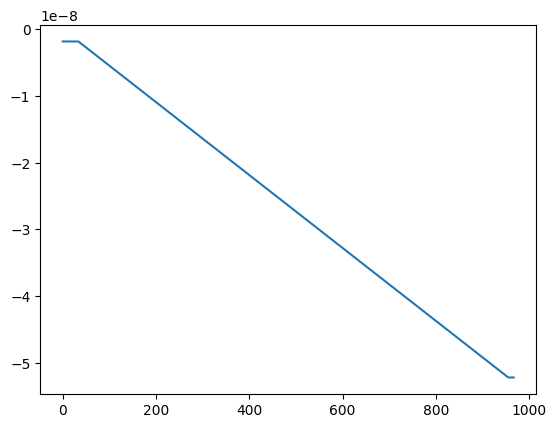

In [ ]:
### Plot rx #based on exercise 1 - neuron course 2021
from functions.savedata import saveplot
plot_rx=h.RangeVarPlot('rx_xtra',cell.soma(0),cell.dend(1)) #spaceplot
graph = plt.gca()
#label1="t={}".format(t)
label1="rx"
plot_rx.plot(graph,label=label1)
#h.PlotShape("rx_xtra")
title="rx_xtra"
#using the GUI

saveplot(folder,title,graph)

In [10]:
# # Transient Time
# trans = 0000


# # setup simulation parameters
# Dt = 0.1			# macroscopic time step <<>>
# npoints = 10000

h.dt = dt			# must be submultiple of Dt
# #tstart = trans
# h.tstop = trans + npoints * Dt
# h.steps_per_ms = 5
h.celsius = 36
# h.v_init = -70



In [11]:
# Record v membrane
soma_v=h.Vector().record(cell.soma(0.5)._ref_v)
t=h.Vector().record(h._ref_t)
is_xtra=h.Vector().record(h._ref_is_xtra)
extracellular_e = h.Vector().record(cell.soma(0.5)._ref_e_extracellular)
extracellular_v_soma = h.Vector().record(cell.soma(0.5)._ref_vext[0])
vrec = h.Vector().record(h._ref_vrec)  # records vrec at each timestep


In [12]:
h.finitialize(cell.v_init)
h.continuerun(simtime)


0.0

In [ ]:
#save the data obtained in the run
from functions.savedata import savedata
#vrec=h._ref_vrec
#vrec=range(len(t))
dend_v=range(len(t))
savedata(folder,0,t,soma_v,dend_v,extracellular_v_soma,is_xtra,vrec)

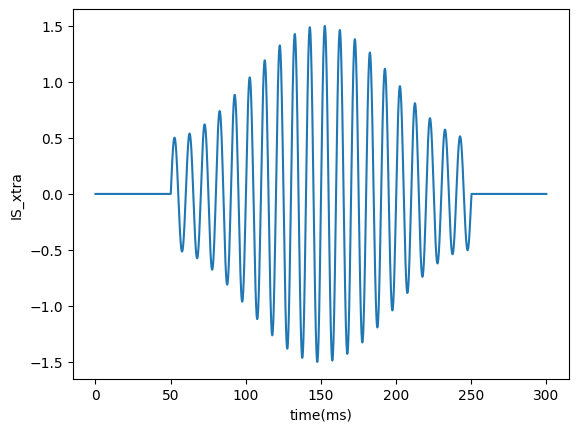

In [ ]:
#plot is over time
title1="IS over time"
fig=plt.Figure()
fig.plot(t,is_xtra,title=title1)
fig.xlabel("time(ms)")
fig.ylabel("IS_xtra")
fig.show()
saveplot(folder,title1,fig)

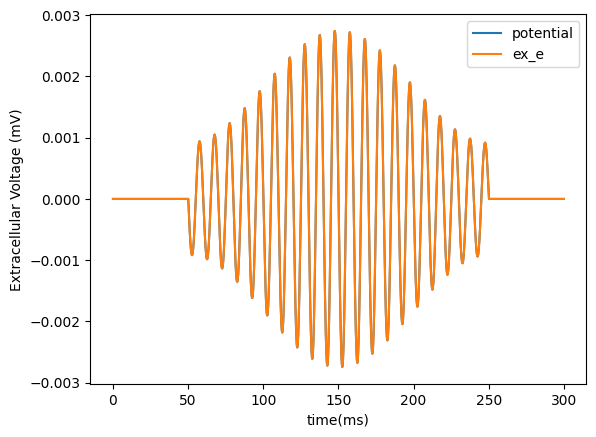

In [ ]:
#plot extracellular voltage over time
#potential at the external surface of the soma
fig=plt.Figure()
title1="Extracellular potential"
fig.plot(t,extracellular_v_soma,label="potential")
fig.plot(t,extracellular_e,label="ex_e")
fig.xlabel("time(ms)")
fig.ylabel("Extracellular Voltage (mV)")
fig.legend()
fig.show()
# print(list(t))
saveplot(folder,title1,fig)

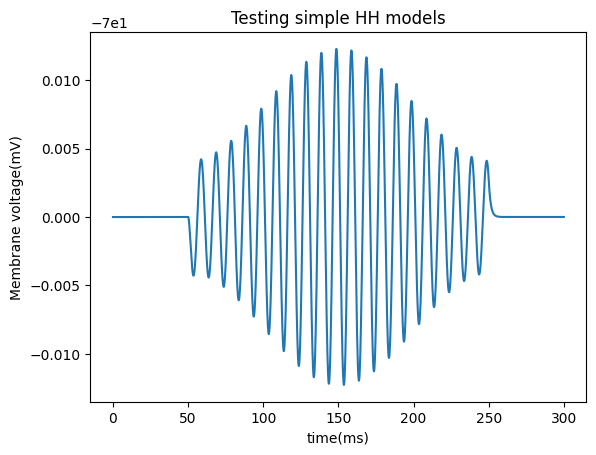

In [16]:
plt.Figure()
plt.plot(t,soma_v)
plt.xlabel("time(ms)")
plt.ylabel("Membrane voltage(mV)")
plt.title("Testing simple HH models")
plt.show()

Vector[5]
[]


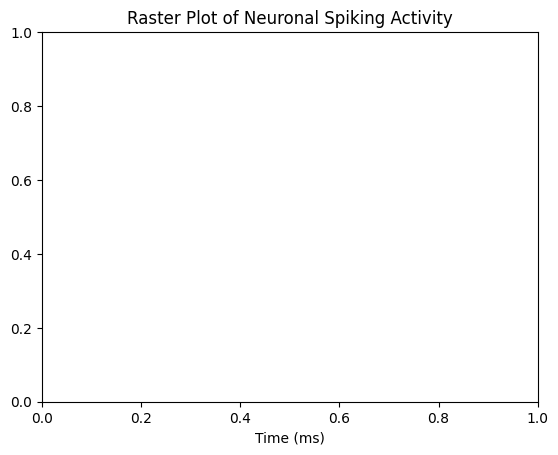

In [17]:
print(cell.spike_times)
spiketimes = cell.spike_times.to_python()
plt.Figure()
plt.vlines(spiketimes,1,5)
plt.xlabel('Time (ms)')
plt.title('Raster Plot of Neuronal Spiking Activity')

print(spiketimes)
if len(spiketimes)>0:
    time=spiketimes[-1]-spiketimes[0]
    freq=len(spiketimes)/time*1000
    print(freq)

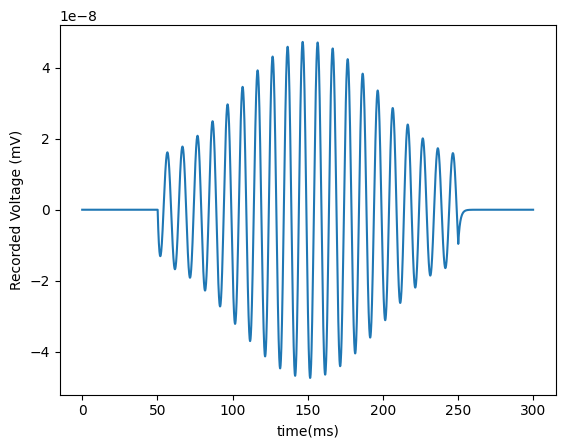

In [18]:
plt.Figure()
plt.plot(t,vrec)
plt.xlabel("time(ms)")
plt.ylabel("Recorded Voltage (mV)")
plt.show()

In [ ]:
# from functions.threshsearch import threshold
# apc=cell.apc_soma
# thresh=threshold(cell,simtime,apc,simparams,stimparams)
# print(thresh*40)

Changed dt
3999877.930908203
